In [34]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency


In [35]:
# Load the dataset
train_df = pd.read_csv('/content/train.csv')


In [36]:
train_df.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [37]:
train_df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [38]:
# Using info() to find the non null rows and data type across columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [39]:
# Function to extract the categorical columns and numerical columns in separate list for ease of EDA
def get_num_cat_cols(df):

    num_cls = [x for x in df.columns if df[x].dtype != 'object']
    cat_cls = [x for x in df.columns if x not in num_cls]

    print(f'Numerical columns \n',num_cls)
    print(f'Categorical columns \n',cat_cls)

    return num_cls, cat_cls

In [40]:
num_cols, cat_cols = get_num_cat_cols(train_df)

Numerical columns 
 ['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result', 'Class/ASD']
Categorical columns 
 ['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc', 'relation']


In [41]:
# Descriptive statistics for numerical columns
train_df[num_cols].describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,28.452118,8.537303,0.201250
std,231.0844,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.310966,4.807676,0.401185
min,1.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.718550,-6.137748,0.000000
25%,200.7500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.198153,5.306575,0.000000
50%,400.5000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.848350,9.605299,0.000000
75%,600.2500,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.865429,12.514484,0.000000
max,800.0000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.461718,15.853126,1.000000


**Inference**
1. Columns - A1_Score to A10_Score has value either 0 or 1, to be considered as binary variable
2. Age starts from min 2 yrs to max 89 yrs with median value in 24.8 yrs and average value in 28.45 yrs
3. Result value ranges from -6.13 to +15.85
4. Target column indicates there is 20% have Autism and 80% dont have autism

In [42]:
# Find the unique values with counts in categorical variables, and check for special characters to do cleaning
for c in cat_cols:
    print('-'*100)
    print(f'Column Name - {c}')
    print('-'*100)
    print(train_df[c].value_counts())

----------------------------------------------------------------------------------------------------
Column Name - gender
----------------------------------------------------------------------------------------------------
gender
m    530
f    270
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Column Name - ethnicity
----------------------------------------------------------------------------------------------------
ethnicity
White-European     257
?                  203
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Others              29
Latino              17
Hispanic             9
Turkish              5
others               3
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Column Name - jaundice
----------------------------------------------------------------

For columns **relation,ethinicity** we have special character **'?'**, which we will replace with **others**

In [43]:
train_df['relation'] = train_df['relation'].replace('?','Others')
train_df['ethnicity'] = train_df['ethnicity'].replace('?','others')


Column - **age_desc** contains single value across all rows, so it is good to drop this column

In [44]:
train_df.drop('age_desc',axis=1,inplace=True)


In [45]:
# Recreating the numerical and categorical columns list
num_cols, cat_cols = get_num_cat_cols(train_df)

Numerical columns 
 ['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result', 'Class/ASD']
Categorical columns 
 ['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'relation']


The values in column with Score is either 0 or 1, so it has to be considered as nominal categorical variable. Adding these columns to cat_cols list

In [46]:
# Moving the binary variables in numerical columns to categorical columns list, for EDA
cat_cols = cat_cols + [x for x in num_cols if '_Score' in x]
print(cat_cols)
num_cols = [x for x in num_cols if x not in cat_cols]
print(num_cols)

['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'relation', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']
['ID', 'age', 'result', 'Class/ASD']


In [47]:
# Function to conduct chi square test between categorical feature and target feature
def chi_sq_test(ct):
    # input crosstab of 2 categorical variables
    stat, p, dof, expected = chi2_contingency(ct)

    # interpret p-value
    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('Both variables are Dependent (reject H0)')
    else:
        print('Both variables are Independent (H0 holds true)')

In [48]:
# Function to plot stacked bar graph between categorical feature and target variable,
# also helps us know the dependent variable using chisquare function - this step is feature selection
def cat_col_test(df, cat_colname, target_colname):

    print(f"Column name - {cat_colname}")
    ct = pd.crosstab(df[cat_colname],df[target_colname])
    chi_sq_test(ct)
for c in cat_cols:
    cat_col_test(train_df, c, 'Class/ASD')

Column name - gender
p value is 0.9758243168741388
Both variables are Independent (H0 holds true)
Column name - ethnicity
p value is 1.4561482608094145e-33
Both variables are Dependent (reject H0)
Column name - jaundice
p value is 0.00013300658957470307
Both variables are Dependent (reject H0)
Column name - austim
p value is 1.0060560058593027e-23
Both variables are Dependent (reject H0)
Column name - contry_of_res
p value is 2.8611111937550227e-19
Both variables are Dependent (reject H0)
Column name - used_app_before
p value is 0.3745543476430917
Both variables are Independent (H0 holds true)
Column name - relation
p value is 0.03206590795264572
Both variables are Dependent (reject H0)
Column name - A1_Score
p value is 4.104487536920418e-17
Both variables are Dependent (reject H0)
Column name - A2_Score
p value is 1.3998012922364413e-25
Both variables are Dependent (reject H0)
Column name - A3_Score
p value is 2.4007562062687566e-38
Both variables are Dependent (reject H0)
Column name

In [49]:
train_df.drop(['used_app_before','gender'],axis=1,inplace=True)

In [50]:
train_df.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'result',
       'relation', 'Class/ASD'],
      dtype='object')

In [51]:
# one hot encoding for categorical variables with only 2 unique values
train_df['jaundice'] = np.where(train_df['jaundice'] == 'yes',1,0)

train_df['austim'] = np.where(train_df['austim'] == 'yes',1,0)

In [52]:
# Label encoding based on frequency values of categorical variable
dict_ethnicity = dict(zip(train_df['ethnicity'].value_counts().index, range(1,train_df['ethnicity'].nunique()+1)))
dict_ethnicity

{'White-European': 1,
 'others': 2,
 'Middle Eastern ': 3,
 'Asian': 4,
 'Black': 5,
 'South Asian': 6,
 'Pasifika': 7,
 'Others': 8,
 'Latino': 9,
 'Hispanic': 10,
 'Turkish': 11}

In [53]:
train_df['ethnicity'] = train_df['ethnicity'].map(dict_ethnicity)

In [54]:
col_name = 'contry_of_res'
dict_country = dict(zip(train_df[col_name].value_counts().index, range(1,train_df[col_name].nunique()+1)))
train_df[col_name] = train_df[col_name].map(dict_country)

In [55]:
col_name = 'relation'
dict_relation = dict(zip(train_df[col_name].value_counts().index, range(1,train_df[col_name].nunique()+1)))
train_df[col_name] = train_df[col_name].map(dict_relation)

In [56]:
train_df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,ethnicity,jaundice,austim,contry_of_res,result,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,2,0,0,11,6.351166,1,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,2,0,0,2,2.255185,1,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,1,0,1,1,14.851484,1,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,2,0,0,1,2.276617,1,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,2,0,0,20,-4.777286,1,0


In [57]:
train_df.isnull().sum()

,0
ID,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0


# Model building - finding best algorithm

In [58]:
X_train = train_df.drop(['ID','Class/ASD'],axis=1)
y_train = train_df['Class/ASD']

X_train.shape, y_train.shape

((800, 17), (800,))

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [60]:
seed = 0
model1 = LogisticRegression(max_iter = 500)
model2 = SVC(random_state = seed)
model3 = KNeighborsClassifier()
model4 = DecisionTreeClassifier(random_state = seed)
model5 = RandomForestClassifier(random_state = seed,class_weight="balanced")
model6 = GradientBoostingClassifier(random_state = seed)

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Machine': SVC(random_state=42, probability=True),  # Enable probability for SVC
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
}

# DataFrame to store predictions
predictions_df = pd.DataFrame()

# Train models and make predictions
for model_name, model in models.items():
    model.fit(X_train_sub, y_train_sub)
    y_pred = model.predict(X_val)  # Make predictions on the validation set

    # Save predictions to DataFrame
    predictions_df[model_name] = y_pred

    # Calculate classification metrics
    acc = accuracy_score(y_val, y_pred)

    # Adjust for binary or multi-class classification
    average = 'binary' if len(set(y_val)) == 2 else 'weighted'  # Automatically detect binary/multi-class

    precision = precision_score(y_val, y_pred, average=average)
    recall = recall_score(y_val, y_pred, average=average)
    f1 = f1_score(y_val, y_pred, average=average)

    # Print evaluation metrics
    print(f"{model_name} - Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

    # Check for overfitting/underfitting using the training score
    train_acc = model.score(X_train_sub, y_train_sub)
    print(f"{model_name} - Training Accuracy: {train_acc:.4f}")

    if train_acc > 0.98:
        print(f"{model_name} is likely overfitting (very high training accuracy).")
    elif train_acc < 0.7:
        print(f"{model_name} is likely underfitting.")
    else:
        print(f"{model_name} seems to have a good balance.")

    print("-" * 100)

# # Save predictions to CSV
# predictions_df.to_csv('classification_predictions.csv', index=False)
# predictions_df


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Logistic Regression - Accuracy: 0.8625, Precision: 0.7188, Recall: 0.6389, F1 Score: 0.6765
Logistic Regression - Training Accuracy: 0.8812
Logistic Regression seems to have a good balance.
----------------------------------------------------------------------------------------------------
Support Vector Machine - Accuracy: 0.7750, Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000
Support Vector Machine - Training Accuracy: 0.8047
Support Vector Machine seems to have a good balance.
----------------------------------------------------------------------------------------------------
K-Nearest Neighbors - Accuracy: 0.7812, Precision: 0.5263, Recall: 0.2778, F1 Score: 0.3636
K-Nearest Neighbors - Training Accuracy: 0.8703
K-Nearest Neighbors seems to have a good balance.
----------------------------------------------------------------------------------------------------
Decision Tree - Accuracy: 0.7937, Precision: 0.5405, Recall: 0.5556, F1 Score: 0.5479
Decision Tree - Training Accurac

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


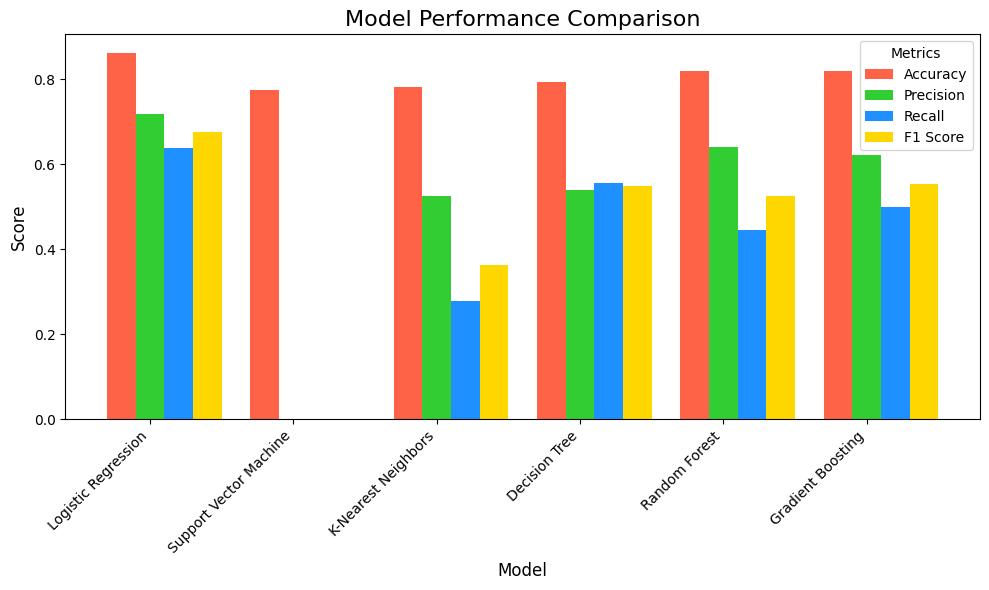

In [62]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Store the metrics for plotting
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Iterate through models to train, predict, and calculate metrics
for model_name, model in models.items():
    model.fit(X_train_sub, y_train_sub)
    y_pred = model.predict(X_val)  # Make predictions on the validation set

    # Calculate classification metrics
    acc = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='binary' if len(set(y_val)) == 2 else 'weighted')
    recall = recall_score(y_val, y_pred, average='binary' if len(set(y_val)) == 2 else 'weighted')
    f1 = f1_score(y_val, y_pred, average='binary' if len(set(y_val)) == 2 else 'weighted')

    accuracy_scores.append(acc)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Plotting the performance metrics
x = np.arange(len(models))  # X-axis locations for the models
width = 0.2  # Bar width for the grouped bars

# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each metric as a grouped bar chart with vibrant colors
ax.bar(x - width, accuracy_scores, width, label='Accuracy', color='#FF6347')  # Tomato red
ax.bar(x, precision_scores, width, label='Precision', color='#32CD32')  # Lime green
ax.bar(x + width, recall_scores, width, label='Recall', color='#1E90FF')  # Dodger blue
ax.bar(x + 2*width, f1_scores, width, label='F1 Score', color='#FFD700')  # Gold

# Customizing the plot
ax.set_title('Model Performance Comparison', fontsize=16)
ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(models.keys(), rotation=45, ha="right")
ax.legend(title="Metrics")

# Display the plot
plt.tight_layout()
plt.show()
